https://docs.opencv.org/master/dd/d43/tutorial_py_video_display.html

# <font style="color:rgb(50,120,229)">Read and display a Video in OpenCV</font>

Just like we used [**`cv2.imread`**](https://docs.opencv.org/4.1.0/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56) to read an image stored on our machine, we will use **`cv2.VideoCapture`** to create a [**VideoCapture**](https://docs.opencv.org/4.1.0/d8/dfe/classcv_1_1VideoCapture.html#ac4107fb146a762454a8a87715d9b7c96) object and read from input file (video).

### <font style="color:rgb(8,133,37)">Function Syntax </font>

``` python
<VideoCapture object>	=	cv.VideoCapture(		)
<VideoCapture object>	=	cv.VideoCapture(	filename[, apiPreference]	)
<VideoCapture object>	=	cv.VideoCapture(	index[, apiPreference]	)

```

**Parameters**

- **`filename`** it can be:
    - name of video file (eg. video.avi)
    - or image sequence (eg. img_%02d.jpg, which will read samples like img_00.jpg, img_01.jpg, img_02.jpg, ...)
    -or URL of video stream (eg. protocol://host:port/script_name?script_params|auth). Note that each video stream or IP camera feed has its own URL scheme. Please refer to the documentation of source stream to know the right URL.
- **`apiPreference`**:	preferred Capture API backends to use. Can be used to enforce a specific reader implementation if multiple are available: e.g. cv::CAP_FFMPEG or cv::CAP_IMAGES or cv::CAP_DSHOW.

## <font style="color:rgb(50,120,229)">Create a video reader object </font>
```python
cap = cv2.VideoCapture(args)
```

Three most popular ways of reading videos using the VideoCapture Object are :
1. Using Webcam ( Pass the argument as 0 )
2. From a video File ( Specify the filename as argument )
3. Image sequence ( e.g. image_%03d.jpg )

#### <font style="color:rgb(200,0,0)">NOTE for Webcam</font>

In most cases, only one camera is connected to the system. So, all we do is pass **`0`** and OpenCV uses the only camera attached to the computer. When more than one camera is connected to the computer, we can select the second camera by passing **`1`**, the third camera by passing **`2`** and so on.

In [1]:
# Import module
import cv2
# from dataPath import DATA_PATH
import matplotlib.pyplot as plt
%matplotlib inline

DATA_PATH = 'data/'

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [3]:
cap = cv2.VideoCapture(DATA_PATH+'videos/chaplin.mp4')
print(cap.isOpened())

# Check if camera opened successfully
if (cap.isOpened()== False): 
    print("Error opening video stream or file")

True


## <font style="color:rgb(50,120,229)">How to read frames? </font>
For reading the video frames, we use the **`cap.read`** function which returns a tuple where the first element is a return value and the second element is the frame. We also use additional functions like **`cap.isOpened()`** to check if the camera or the video file has opened correctly.

In [4]:
ret, frame = cap.read()

print(ret)
print(frame.shape)

True
(360, 640, 3)


## <font style="color:rgb(50,120,229)">Display the Video</font>
After reading a video file, we can display the video frame by frame. A frame of a video is simply an image and we display each frame the same way we display images, i.e., we use the function **`cv2.imshow()`**.

Usually, you would use your local system while working with videos instead of Jupyter Notebooks. But since, everything is covered in both modes, we will describe how to display the read frames in two ways. 

1. Using matplotlib imshow on the Notebook itself.
1. Using cv2.imshow in the Local python script

## <font style="color:rgb(50,120,229)">Display the frame using Matplotlib </font>

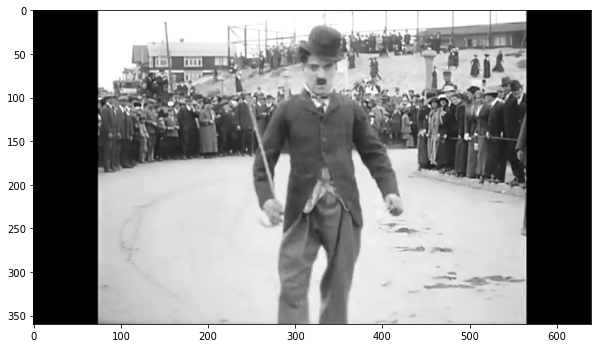

In [5]:
plt.imshow(frame[...,::-1])
plt.show()

## <font style="color:rgb(50,120,229)">Displaying the frames as video [ For Local only ]</font>

As in the case of an image, we use the [**`cv2.waitKey()`**](https://docs.opencv.org/4.1.0/d7/dfc/group__highgui.html#ga5628525ad33f52eab17feebcfba38bd7) after [**`cv2.imshow()`**](https://docs.opencv.org/4.1.0/d7/dfc/group__highgui.html#ga453d42fe4cb60e5723281a89973ee563) function to pause each frame in the video. In the case of an image, we pass **`0`** to the `waitKey` function, but for playing a video, we need to pass a number greater than `0` to the waitKey() function. This is because `0` would pause the frame in the video for an infinite amount of time and in a video we need each frame to be shown only for some finite interval of time, so we need to pass a number greater than `0` to the `waitKey` function. **This number is equal to the time in milliseconds we want each frame to be displayed.**

#### <font style="color:rgb(50,120,229)">waitKey value for Webcam</font>
While reading the frames from a webcam, using `waitKey(1)` is appropriate because the display frame rate will be limited by the frame rate of the webcam even if we specify a delay of 1 ms in waitKey.

#### <font style="color:rgb(50,120,229)">waitKey value for video file</font>
While reading frames from a video that you are processing, it may still be appropriate to set the time delay to 1 ms so that the thread is freed up to do the processing we want to do.

In rare cases, when the playback needs to be at a certain frame rate, we may want the delay to be higher than 1 ms.

In [15]:
cap = cv2.VideoCapture(DATA_PATH+'videos/chaplin.mp4')
curr_frame_count = 0
print(cap.get(cv2.CAP_PROP_POS_MSEC))


# Read until video is completed
while(cap.isOpened()):
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if ret == True:
        curr_frame_count +=1 
        cv2.imshow("Video Output", frame)   
        
        # OPTION 1
        # Wait for 50 ms before moving on to the next frame. This will slow down the video
        # cv2.waitKey(50)
        
        # OPTION 2
        # leave the argument empty and play the video frame by frame. Freezes the video at a frame. 
        # print(curr_frame_count, round(cap.get(cv2.CAP_PROP_POS_MSEC), 1) )
        # cv2.waitKey()
        
        # OPTION 3
        # Set the argument to 0 and play the video frame by frame. Freezes the video at a frame. 
        # cv2.waitKey(0)

        # OPTION 4
        # Display 30 Frames per Second
        # cv2.waitKey(int(1000/30))
        cv2.waitKey(int(cap.get(cv2.CAP_PROP_FPS)))
        
        
  # Break the loop
    else: 
        break

# print(int(1000/30))
# print(int(cap.get(cv2.CAP_PROP_POS_MSEC)))
cap.release()
cv2.destroyAllWindows()

0.0


In [11]:
# WEBCAM
cap = cv2.VideoCapture(0)

while(cap.isOpened()):
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if ret == True:
        cv2.imshow("Video Output", frame)   
        
        # OPTION 1
        # if cv2.waitKey(1) & 0xFF == ord('q'):
        #     break

        # OPTION 2
        k = cv2.waitKey(1)
        if k==27:    # Esc key to stop
            break
        elif k==-1:  # normally -1 returned,so don't print it
            continue
        else:
            print(k) # else print its value

    # Break the loop
    else: 
        break
        
cap.release()
cv2.destroyAllWindows()

119
101
114
113


In [12]:
ord('q')

113

#### <font style="color:rgb(200,0,0)">NOTE</font>

Since we are using a Jupyter Notebook, we will use HTML magic command available in Jupyter Notebook to display the video. You can also use the python scripts(`.py` files) which use **`cv2.imshow`** to display the videos in a new window. 

In [ ]:
%%HTML
<video controls>
    <source src="https://www.learnopencv.com/wp-content/uploads/2020/08/chaplin.mp4" type="video/mp4">
</video>

# <font style="color:rgb(50,120,229)">Get properties of VideoCapture</font>

So far we have seen how to read a video. Next, we will see how to extract some properties from video and how to set those properties using **`cap.get(propId)`** and **`cap.set(propId,value)`** respectively. 

Here, **`cap`** is the **`VideoCapture`** object from where we want to extract (or set) the properties, **`propId`** stands for the [Property ID](https://docs.opencv.org/4.1.0/d4/d15/group__videoio__flags__base.html#gaeb8dd9c89c10a5c63c139bf7c4f5704d) and **`value`** is the value we want to set for the property with id **`propId`**.

Here are some of the common properties and their ID.

| Enumerator | Numerical Value | Property |
| --- | --- | --- |
| **`cv2.CAP_PROP_POS_MSEC`** | `0` | Current position of the video file in milliseconds |
| **`cv2.CAP_PROP_FRAME_WIDTH`** | `3` | Width of the frames in the video stream |
| **`cv2.CAP_PROP_FRAME_HEIGHT`** | `4` | Height of the frames in the video stream |
| **`cv2.CAP_PROP_FPS`** | `5` | Frame rate |
| **`cv2.CAP_PROP_FOURCC`** | `6` | 4-character code of codec |

Let's dig deeper into this with the help of an example.

In [13]:
# Let's create the VideoCapture object
cap = cv2.VideoCapture(DATA_PATH+'videos/chaplin.mp4')

# OPTION 1
# width = cap.get(3)
# height = cap.get(4)
# frame_rate = cap.get(5)
# coding = cap.get(6)

# OPTION 2
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
frame_rate = cap.get(cv2.CAP_PROP_FPS)
coding = cap.get(cv2.CAP_PROP_FOURCC)

print(width, height)
print(type(width), type(height))
print('Frame rate:', round(frame_rate, 2))
print('Coding:',coding)

cap.release()
print('Closed? -', not cap.isOpened())

640.0 360.0
<class 'float'> <class 'float'>
Frame rate: 29.72
Coding: 828601953.0
Closed? - True


## <font style="color:rgb(50,120,229)">Setting the video properties</font>

We can use the `set` method to change the properties of the video device. For example we can change the height and width of the input video while reading. 

#### <font style="color:rgb(200,0,0)">Note </font>

It might happen that the set property function gives unexpected results. This is because the setting of property may be disabled for the file or webcam. For example, you might not be able to set the properties for the video file that we are working with, but you can set the width and height of your webcam input. 

Even for the webcam, it is not possible to set arbitrary values. Whatever values you set should be supported by the device. ( For example, the default resolution of my webcam is 720x1280. If I want to set it to 200x200, it might not happen and get set to something else, say 640x480, which is supported by the webcam. )

In [17]:
cap = cv2.VideoCapture(DATA_PATH+'videos/chaplin.mp4')
# Width
ret = cap.set(3, 320)
print(ret)
# Height
ret = cap.set(4, 180)
print(ret)

False
False


It prints `false` which means that the video property we wanted to set was not done correctly.

In [19]:
cap.release()

So, we can't change the frame size for the video file.

Try it on your webcam and see if you can change frame size before reading

In [16]:
cap = cv2.VideoCapture(0)

print('WIDTH:', cap.get(cv2.CAP_PROP_FRAME_WIDTH))
print('HEIGHT:', cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print('FPS:', cap.get(cv2.CAP_PROP_FPS))

cap.set(cv2.CAP_PROP_FRAME_WIDTH, 200)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 400)
cap.set(cv2.CAP_PROP_FPS, 1)           # NOT WORKING! CANNOT SET FPS!

print('WIDTH:', cap.get(cv2.CAP_PROP_FRAME_WIDTH))
print('HEIGHT:',cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print('FPS:', cap.get(cv2.CAP_PROP_FPS))

while cap.isOpened():
    ret, image = cap.read()
    
    cv2.imshow('WebCam', image)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

WIDTH: 640.0
HEIGHT: 480.0
FPS: 30.0
WIDTH: 424.0
HEIGHT: 240.0
FPS: 30.0


# <font style="color:rgb(50,120,229)">Write a Video in OpenCV</font>

After we are done with capturing and processing the video frame by frame, the next step we would want to do is to save the video.

For images, it is straightforward. We just need to use [**`cv2.imwrite()`**](https://docs.opencv.org/4.1.0/d4/da8/group__imgcodecs.html#gabbc7ef1aa2edfaa87772f1202d67e0ce) and specify an image format(jpg/png). But for videos, some more info is required. 

The steps are as follows:

__1__. Create a [**`VideoWriter`**](https://docs.opencv.org/4.1.0/dd/d9e/classcv_1_1VideoWriter.html#ac3478f6257454209fa99249cc03a5c59) object

### <font style="color:rgb(8,133,37)">Function Syntax </font>

```python
<VideoWriter object>	=	cv.VideoWriter(		)
<VideoWriter object>	=	cv.VideoWriter(	filename, fourcc, fps, frameSize[, isColor]	)
<VideoWriter object>	=	cv.VideoWriter(	filename, apiPreference, fourcc, fps, frameSize[, isColor]	)
```

**Parameters**
- **`filename`**: Name of the output video file.
- **`fourcc`**:	4-character code of codec used to compress the frames. For example, VideoWriter::fourcc('P','I','M','1') is a MPEG-1 codec, VideoWriter::fourcc('M','J','P','G') is a motion-jpeg codec etc. List of codes can be obtained at Video Codecs by FOURCC page. FFMPEG backend with MP4 container natively uses other values as fourcc code: see ObjectType, so you may receive a warning message from OpenCV about fourcc code conversion.
- **`fps`**:	Framerate of the created video stream.
- **`frameSize`**:	Size of the video frames.
- **`isColor`**:	If it is not zero, the encoder will expect and encode color frames, otherwise it will work with grayscale frames (the flag is currently supported on Windows only).

**2**. Write frames to the object in a loop.

**3**. Close and release the object.


### <font style="color:rgb(50,120,229)">FourCC Code</font>

[FourCC](https://en.wikipedia.org/wiki/FourCC) is a 4-byte code used to specify the video codec. The list of available codes can be found at [fourcc.org](http://fourcc.org/). There are many FOURCC codes available, but in this lecture we would work only with MJPG.

#### <font style="color:rgb(200,0,0)">Note</font>
Only a few of the FourCC codes listed above will work on your system based on the availability of the codecs on your system. Sometimes, even when the specific codec is available, OpenCV may not be able to use it. **MJPG is a safe choice.**

In [107]:
cap = cv2.VideoCapture(DATA_PATH+'videos/chaplin.mp4')

import numpy as np

FPS = cap.get(cv2.CAP_PROP_FPS)
frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
duration = frame_count/FPS

print(duration)
print(frame_count)
print(FPS)

##############################################################################

# Default resolutions of the frame are obtained. Convert the resolutions from float to integer.
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# Define the codec and create VideoWriter object. The output is stored in 'outputChaplin.mp4' file.
out = cv2.VideoWriter('data/videos/outputChaplin10.mp4', 
                      cv2.VideoWriter_fourcc('M','J','P','G'), 
                      10, 
                      (frame_width, frame_height))

##############################################################################

frame_i = 0
# Read until video is completed
while(cap.isOpened()):
    
    # Capture frame-by-frame
    ret, frame = cap.read()

    if ret == True:

    # Write the frame into the file 'outputChaplin.mp4'
        out.write(frame)

        # Wait for 25 ms before moving on to the next frame. This will slow down the video writing process
        # cv2.waitKey(200)
        
        # print(frame_i+1, '/', frame_count, end='\r')
        # frame_i += 1
        
        # print(frame_i, ':', cap.get(cv2.CAP_PROP_POS_MSEC))
        
    # Break the loop
    else: 
        break
        
# When everything done, release the VideoCapture and VideoWriter objects
cap.release()
out.release()

5.787434895833333
172.0
29.719556780471343


In [108]:
cap = cv2.VideoCapture(DATA_PATH+'videos/outputChaplin10.mp4')

import numpy as np

FPS = cap.get(cv2.CAP_PROP_FPS)      
frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
duration = frame_count/FPS

print(duration)
print(frame_count)
print(FPS)

cap.release()

15.0
150.0
10.0


In [109]:
cap = cv2.VideoCapture(DATA_PATH+'videos/chaplin.mp4')

import numpy as np

FPS = cap.get(cv2.CAP_PROP_FPS)      
frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
duration = frame_count/FPS

print(duration)
print(frame_count)
print(FPS)

##############################################################################

# Default resolutions of the frame are obtained. Convert the resolutions from float to integer.
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# Define the codec and create VideoWriter object. The output is stored in 'outputChaplin.mp4' file.
out = cv2.VideoWriter('data/videos/outputChaplin30.mp4', 
                      cv2.VideoWriter_fourcc('M','J','P','G'), 
                      FPS,
                      (frame_width, frame_height))

##############################################################################

# Read until video is completed
while(cap.isOpened()):
    
    # Capture frame-by-frame
    ret, frame = cap.read()

    if ret == True:

    # Write the frame into the file 'outputChaplin.mp4'
        out.write(frame)

    # Break the loop
    else: 
        break
        
# When everything done, release the VideoCapture and VideoWriter objects
cap.release()
out.release()

5.787434895833333
172.0
29.719556780471343


In [110]:
cap = cv2.VideoCapture(DATA_PATH+'videos/outputChaplin30.mp4')

import numpy as np

FPS = cap.get(cv2.CAP_PROP_FPS)      
frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
duration = frame_count/FPS

print(duration)
print(frame_count)
print(FPS)

cap.release()

5.047106325706595
150.0
29.72


In [103]:
cap = cv2.VideoCapture(DATA_PATH+'videos/street.mp4')

import numpy as np

FPS = cap.get(cv2.CAP_PROP_FPS)      
frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
duration = frame_count/FPS

print(duration)
print(frame_count)
print(FPS)

##############################################################################

# Default resolutions of the frame are obtained. Convert the resolutions from float to integer.
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# Define the codec and create VideoWriter object. The output is stored in 'outputChaplin.mp4' file.
out = cv2.VideoWriter('data/videos/street30.mp4', 
                      cv2.VideoWriter_fourcc('M','J','P','G'), 
                      FPS,
                      (frame_width, frame_height))

##############################################################################

# Read until video is completed
while(cap.isOpened()):
    
    # Capture frame-by-frame
    ret, frame = cap.read()

    if ret == True:

    # Write the frame into the file 'outputChaplin.mp4'
        out.write(frame)

    # Break the loop
    else: 
        break
        
# When everything done, release the VideoCapture and VideoWriter objects
cap.release()
out.release()

14.766666666666667
443.0
30.0


In [104]:
cap = cv2.VideoCapture(DATA_PATH+'videos/street30.mp4')

import numpy as np

FPS = cap.get(cv2.CAP_PROP_FPS)      
frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
duration = frame_count/FPS

print(duration)
print(frame_count)
print(FPS)

cap.release()

14.766666666666667
443.0
30.0
